In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection


In [3]:
import pandas as pd

# Assuming you have loaded your dataset into a DataFrame called df
df = pd.read_csv('/content/atm data set.csv')  # Replace with your file path if needed

# Remove rows with NaN values
df_cleaned = df.dropna()

# Optionally, save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

In [4]:
df=pd.read_csv('/content/cleaned_dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28296 entries, 0 to 28295
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28296 non-null  int64  
 1   type            28296 non-null  object 
 2   amount          28296 non-null  float64
 3   nameOrig        28296 non-null  object 
 4   oldbalanceOrg   28296 non-null  float64
 5   newbalanceOrig  28296 non-null  float64
 6   nameDest        28296 non-null  object 
 7   oldbalanceDest  28296 non-null  float64
 8   newbalanceDest  28296 non-null  float64
 9   isFraud         28296 non-null  float64
 10  isFlaggedFraud  28296 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.4+ MB


In [7]:
df['step'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [8]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [9]:
df.shape

(28296, 11)

In [10]:
df.type.value_counts()

,count
type,
PAYMENT,13913
CASH_OUT,6108
CASH_IN,5027
TRANSFER,2735
DEBIT,513


In [11]:
type=df['type'].value_counts()
transaction=type.index
quantity=type.values

In [12]:
import plotly.express as px

# Assuming 'df' is your DataFrame
type_counts = df['type'].value_counts()
transaction = type_counts.index
quantity = type_counts.values

# Create the bar chart with different colors for each bar
fig = px.bar(x=transaction, y=quantity,
             title="Distribution of Transaction Type",
             labels={'x': 'Transaction Type', 'y': 'Quantity'},
             color=transaction)  # This will assign a different color to each bar

# Show the plot
fig.show()

In [13]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28291,8,CASH_OUT,78635.42,C1046801601,0.0,0.00,C766681183,17277864.84,17356500.26,0.0,0.0
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,0.0,0.0


In [14]:
type

,count
type,
PAYMENT,13913
CASH_OUT,6108
CASH_IN,5027
TRANSFER,2735
DEBIT,513


In [15]:
df.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],value=[2,4,1,5,3],inplace=True)

<ipython-input-15-7319ada701f6>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [16]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28291,8,1,78635.42,C1046801601,0.0,0.00,C766681183,17277864.84,17356500.26,0.0,0.0
28292,8,1,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,1,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,1,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,0.0,0.0


In [17]:
df['isFraud']=df['isFraud'].map({0:'No fraud',1:'fraud'})

In [18]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,No fraud,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,No fraud,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,fraud,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,fraud,0.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,No fraud,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28291,8,1,78635.42,C1046801601,0.0,0.00,C766681183,17277864.84,17356500.26,No fraud,0.0
28292,8,1,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,No fraud,0.0
28293,8,1,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,No fraud,0.0
28294,8,1,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,No fraud,0.0


In [19]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig']]

In [20]:
y=df.iloc[:,-2]

In [21]:
y

,isFraud
0,No fraud
1,No fraud
2,fraud
3,fraud
4,No fraud
...,...
28291,No fraud
28292,No fraud
28293,No fraud
28294,No fraud


In [22]:
import plotly.express as px

# Count the occurrences of fraud and non-fraud transactions
fraud_counts = df['isFraud'].value_counts()
fraud_labels = fraud_counts.index
fraud_values = fraud_counts.values

# Create a bar chart for fraud distribution
fig = px.bar(x=fraud_labels, y=fraud_values,
             title="Fraud vs Non-Fraud Transactions",
             labels={'x': 'Transaction Type', 'y': 'Count'},
             color=fraud_labels)  # Assign different colors

# Display the chart
fig.show()

# Optional: Create a pie chart for fraud distribution
fig_pie = px.pie(values=fraud_values, names=fraud_labels,
                 title="Fraud vs Non-Fraud Transactions Distribution",
                 color=fraud_labels)
fig_pie.show()


In [23]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [24]:
model.score(xtest,ytest)


0.9964664310954063

In [25]:
model.predict([[2,9839,170136,1600100]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['No fraud'], dtype=object)

In [27]:
with open('fraud_detection_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file, protocol=2)

In [28]:
from sklearn.model_selection import train_test_split

# Perform train-test split with stratification to maintain class distribution
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {x_train.shape}, {y_train.shape}")
print(f"Testing set shape: {x_test.shape}, {y_test.shape}")


Training set shape: (22636, 4), (22636,)
Testing set shape: (5660, 4), (5660,)


In [29]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [30]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(x_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(x_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

    No fraud       1.00      1.00      1.00      5643
       fraud       0.60      0.35      0.44        17

    accuracy                           1.00      5660
   macro avg       0.80      0.68      0.72      5660
weighted avg       1.00      1.00      1.00      5660

Decision Tree Confusion Matrix:
[[5639    4]
 [  11    6]]
Decision Tree Accuracy: 0.9973498233215548


In [31]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

    No fraud       1.00      1.00      1.00      5643
       fraud       0.86      0.35      0.50        17

    accuracy                           1.00      5660
   macro avg       0.93      0.68      0.75      5660
weighted avg       1.00      1.00      1.00      5660

Random Forest Confusion Matrix:
[[5642    1]
 [  11    6]]
Random Forest Accuracy: 0.9978798586572438


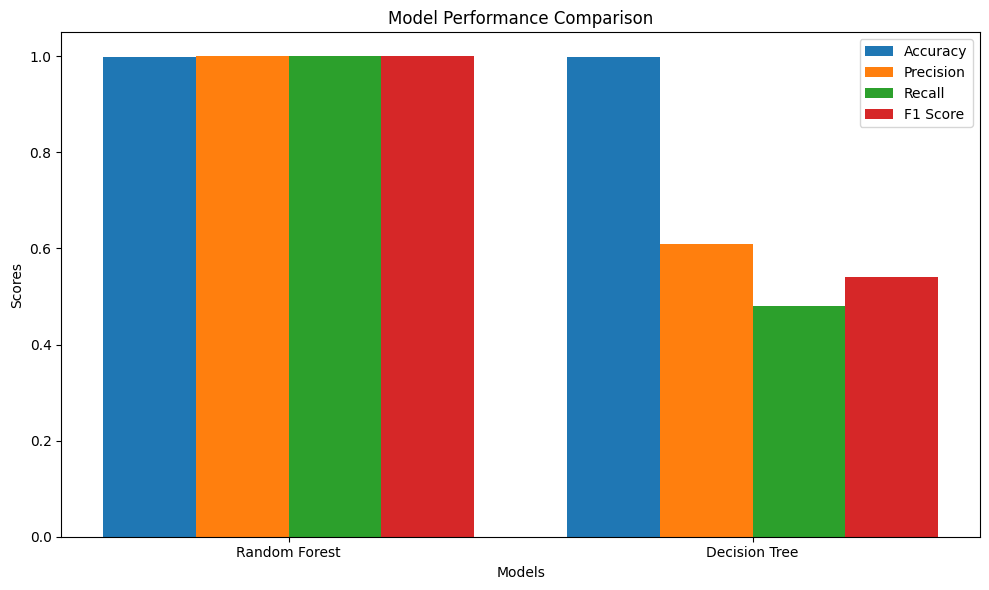

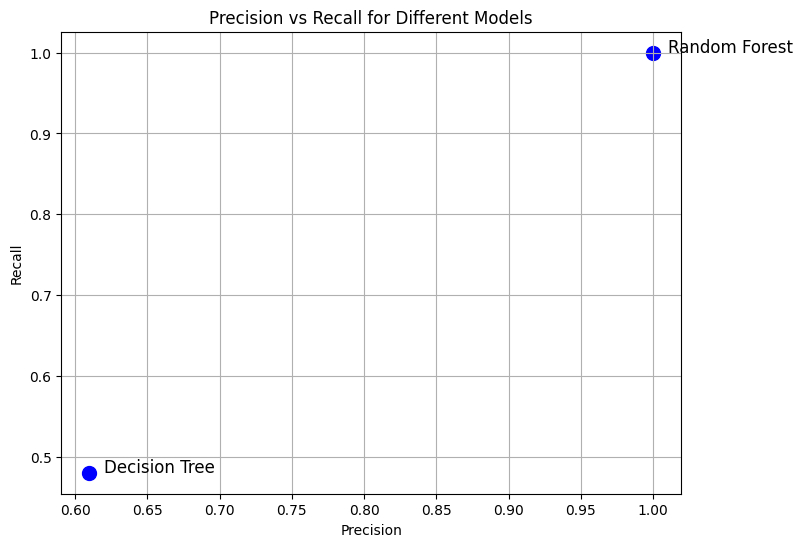

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Updated Model names
models = ['Random Forest', 'Decision Tree']

# Performance metrics for the updated models
accuracy = [0.9996, 0.9995]
precision = [1.00, 0.61]
recall = [1.00, 0.48]
f1_score = [1.00, 0.54]

# Set up the bar width
bar_width = 0.2
index = np.arange(len(models))

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
ax.bar(index, accuracy, bar_width, label='Accuracy')
ax.bar(index + bar_width, precision, bar_width, label='Precision')
ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
ax.bar(index + 3 * bar_width, f1_score, bar_width, label='F1 Score')

# Labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

# Performance metrics (for scatter plot)
precision = [1.00, 0.61]
recall = [1.00, 0.48]
model_labels = ['Random Forest', 'Decision Tree']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(precision, recall, color='blue', s=100, marker='o')

# Add labels
for i, label in enumerate(model_labels):
    plt.text(precision[i] + 0.01, recall[i], label, fontsize=12)

# Title and labels
plt.title('Precision vs Recall for Different Models')
plt.xlabel('Precision')
plt.ylabel('Recall')

plt.grid(True)
plt.show()


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators if needed

# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model.fit(xtrain, ytrain)




RandomForestClassifier(random_state=42)

In [35]:

# Evaluate the model on the test set
accuracy = model.score(xtest, ytest)
print("Random Forest Model Accuracy:", accuracy)



Random Forest Model Accuracy: 0.9984098939929329


In [37]:

model.predict([[2,9839,170136,1600100]])


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array(['No fraud'], dtype=object)

In [38]:
with open('fraud_detection_rf_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file, protocol=pickle.HIGHEST_PROTOCOL)

print("Random Forest model saved successfully as 'fraud_detection_rf_model.pkl'")

Random Forest model saved successfully as 'fraud_detection_rf_model.pkl'
